In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
from keras.preprocessing.image import ImageDataGenerator # Library for data augmentation
from keras import backend, models, layers, optimizers
from keras.layers import Dense, Flatten

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import scipy

In [3]:
# Construct the path to each desired file
base_path = "input/"

train_dir = base_path + "train/"
valid_dir = base_path + "valid/"
test_dir = base_path + "test/"

In [4]:
# Data will flow through this generator and will normalize
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Moves data from their respective directories to the model
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=20,
    class_mode="categorical")

valid_gen = train_datagen.flow_from_directory(
    valid_dir,
    target_size=(224,224),
    batch_size=20,
    class_mode="categorical")

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=20,
    class_mode="categorical")

Found 45980 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.


### Building Model

Now that the data generators have been built, it is time to test a few different architectures in order to determine the most promising. Due to time constraints and my success with transfer learning, I will explore a few of these methods. Transfer Learning is a series of pre-built models using various architectures, pre-trained for excellent performance on the ImageNet dataset.

I will be testing 3 different architectures: VGG16, ResNet50v2, and InceptionV3.

VGG16 is commonly used in image recognition applications because of its design that is lighter-weight and faster than other architectures while maintaining respectable accuracy. ResNet50v2 proved to be a rather robust design in my previous tests, while also being faster and more accurate than VGG16 on the ImageNet data. InceptionV3 was negligibly faster and more accurate than ResNet50v2 on the ImageNet data.

There are more accurate/faster architectures, but in an effort to balance these two factors (which appear to be inversely proportional) I have settled on these three architectures for testing. Once I compare the models on this data, I will then decide on which model to use for further tuning.

While I do plan on use data augmentation, this is something I will introduce to the chosen model later.

In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import InceptionV3

In [7]:
# setting up base model
backend.clear_session()

vgg_base = VGG16(weights = 'imagenet',
                include_top = False,
                input_shape = (224,224,3))

resnet_base = ResNet50V2(weights = 'imagenet',
                        include_top = False,
                        input_shape = (224, 224, 3))

inception_base = InceptionV3(weights = 'imagenet',
                            include_top = False,
                            input_shape = (224, 224, 3))

In [8]:
# Ensuring weights do not change
vgg_base.trainable = False
resnet_base.trainable = False
inception_base.trainable = False

In [9]:
# model creation
# VGG16
model_vgg = models.Sequential()
model_vgg.add(vgg_base)
model_vgg.add(layers.Flatten())
model_vgg.add(layers.Dense(1028, activation='relu'))
model_vgg.add(layers.Dense(315, activation='softmax'))

# ResNet50V2
model_resnet = models.Sequential()
model_resnet.add(resnet_base)
model_resnet.add(layers.Flatten())
model_resnet.add(layers.Dense(1028, activation='relu'))
model_resnet.add(layers.Dense(315, activation='softmax'))

# InceptionV3
model_inception = models.Sequential()
model_inception.add(inception_base)
model_inception.add(layers.Flatten())
model_inception.add(layers.Dense(1028, activation='relu'))
model_inception.add(layers.Dense(315, activation='softmax'))

In [10]:
# Compiling models
# VGG16
model_vgg.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

# ResNet50V2
model_resnet.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])

# InceptionV3
model_inception.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                       loss = 'categorical_crossentropy',
                       metrics = ['accuracy'])

In [11]:
# Fit VGG16 model and store information
history_vgg = model_vgg.fit(train_gen,
                       steps_per_epoch = 100,
                       epochs = 150,
                       validation_data = valid_gen,
                       validation_steps = 50)

history_dict_vgg = history_vgg.history
loss_values_vgg = history_dict_vgg['loss']
val_loss_values_vgg = history_dict_vgg['val_loss']
acc_values_vgg = history_dict_vgg['accuracy']
val_acc_values_vgg = history_dict_vgg['val_accuracy']
epochs_vgg = range(1, len(history_dict_vgg['accuracy']) +1)

Epoch 1/150
100/100 [==============================] - 151s 2s/step - loss: 5.8275 - accuracy: 0.0115 - val_loss: 5.6359 - val_accuracy: 0.0340
Epoch 2/150
100/100 [==============================] - 144s 1s/step - loss: 5.5247 - accuracy: 0.0430 - val_loss: 5.4362 - val_accuracy: 0.0520
Epoch 3/150
100/100 [==============================] - 144s 1s/step - loss: 5.2521 - accuracy: 0.0785 - val_loss: 5.0361 - val_accuracy: 0.1130
Epoch 4/150
100/100 [==============================] - 141s 1s/step - loss: 4.8836 - accuracy: 0.1190 - val_loss: 4.7240 - val_accuracy: 0.1390
Epoch 5/150
100/100 [==============================] - 151s 2s/step - loss: 4.5490 - accuracy: 0.1650 - val_loss: 4.3282 - val_accuracy: 0.1880
Epoch 6/150
100/100 [==============================] - 149s 1s/step - loss: 4.1473 - accuracy: 0.2235 - val_loss: 4.1808 - val_accuracy: 0.1980
Epoch 7/150
100/100 [==============================] - 149s 1s/step - loss: 3.8915 - accuracy: 0.2575 - val_loss: 3.7301 - val_accuracy:

100/100 [==============================] - 143s 1s/step - loss: 0.1988 - accuracy: 0.9630 - val_loss: 0.6371 - val_accuracy: 0.8310
Epoch 114/150
100/100 [==============================] - 145s 1s/step - loss: 0.1848 - accuracy: 0.9695 - val_loss: 0.6863 - val_accuracy: 0.8340
Epoch 115/150
100/100 [==============================] - 143s 1s/step - loss: 0.1648 - accuracy: 0.9750 - val_loss: 0.7143 - val_accuracy: 0.8220
Epoch 116/150
100/100 [==============================] - 144s 1s/step - loss: 0.1949 - accuracy: 0.9605 - val_loss: 0.7155 - val_accuracy: 0.8200
Epoch 117/150
100/100 [==============================] - 141s 1s/step - loss: 0.1790 - accuracy: 0.9680 - val_loss: 0.6590 - val_accuracy: 0.8190
Epoch 118/150
100/100 [==============================] - 143s 1s/step - loss: 0.1655 - accuracy: 0.9730 - val_loss: 0.6858 - val_accuracy: 0.8270
Epoch 119/150
100/100 [==============================] - 143s 1s/step - loss: 0.1572 - accuracy: 0.9770 - val_loss: 0.6376 - val_accuracy:

In [12]:
# Fit ResNet50V2 model and store information
history_resnet = model_resnet.fit(train_gen,
                       steps_per_epoch = 100,
                       epochs = 150,
                       validation_data = valid_gen,
                       validation_steps = 50)

history_dict_resnet = history_resnet.history
loss_values_resnet = history_dict_resnet['loss']
val_loss_values_resnet = history_dict_resnet['val_loss']
acc_values_resnet = history_dict_resnet['accuracy']
val_acc_values_resnet = history_dict_resnet['val_accuracy']
epochs_resnet = range(1, len(history_dict_resnet['accuracy']) +1)

Epoch 1/150
100/100 [==============================] - 83s 809ms/step - loss: 5.3454 - accuracy: 0.1695 - val_loss: 3.7440 - val_accuracy: 0.3150
Epoch 2/150
100/100 [==============================] - 80s 801ms/step - loss: 3.3415 - accuracy: 0.3515 - val_loss: 2.5421 - val_accuracy: 0.4490
Epoch 3/150
100/100 [==============================] - 80s 803ms/step - loss: 2.4253 - accuracy: 0.5035 - val_loss: 1.9638 - val_accuracy: 0.5600
Epoch 4/150
100/100 [==============================] - 81s 814ms/step - loss: 1.8416 - accuracy: 0.6105 - val_loss: 1.6460 - val_accuracy: 0.6230
Epoch 5/150
100/100 [==============================] - 81s 807ms/step - loss: 1.6317 - accuracy: 0.6375 - val_loss: 1.4589 - val_accuracy: 0.6580
Epoch 6/150
100/100 [==============================] - 81s 816ms/step - loss: 1.5001 - accuracy: 0.6715 - val_loss: 1.3336 - val_accuracy: 0.6790
Epoch 7/150
100/100 [==============================] - 80s 804ms/step - loss: 1.3225 - accuracy: 0.6980 - val_loss: 1.1877 -

Epoch 57/150
100/100 [==============================] - 79s 796ms/step - loss: 0.3050 - accuracy: 0.9405 - val_loss: 0.8114 - val_accuracy: 0.8360
Epoch 58/150
100/100 [==============================] - 79s 794ms/step - loss: 0.2143 - accuracy: 0.9480 - val_loss: 0.6739 - val_accuracy: 0.8570
Epoch 59/150
100/100 [==============================] - 80s 799ms/step - loss: 0.2363 - accuracy: 0.9420 - val_loss: 0.8461 - val_accuracy: 0.8470
Epoch 60/150
100/100 [==============================] - 79s 792ms/step - loss: 0.2526 - accuracy: 0.9455 - val_loss: 0.8257 - val_accuracy: 0.8180
Epoch 61/150
100/100 [==============================] - 79s 796ms/step - loss: 0.2263 - accuracy: 0.9385 - val_loss: 0.7782 - val_accuracy: 0.8430
Epoch 62/150
100/100 [==============================] - 81s 808ms/step - loss: 0.2450 - accuracy: 0.9430 - val_loss: 0.7451 - val_accuracy: 0.8620
Epoch 63/150
100/100 [==============================] - 80s 799ms/step - loss: 0.2285 - accuracy: 0.9410 - val_loss: 0

In [13]:
# Fit InceptionV3 model and store information
history_inception = model_inception.fit(train_gen,
                       steps_per_epoch = 100,
                       epochs = 150,
                       validation_data = valid_gen,
                       validation_steps = 50)

history_dict_inception = history_inception.history
loss_values_inception = history_dict_inception['loss']
val_loss_values_inception = history_dict_inception['val_loss']
acc_values_inception = history_dict_inception['accuracy']
val_acc_values_inception = history_dict_inception['val_accuracy']
epochs_inception = range(1, len(history_dict_inception['accuracy']) +1)

Epoch 1/150
100/100 [==============================] - 115s 1s/step - loss: 5.4357 - accuracy: 0.1285 - val_loss: 4.1966 - val_accuracy: 0.2170
Epoch 2/150
100/100 [==============================] - 172s 2s/step - loss: 3.6390 - accuracy: 0.2960 - val_loss: 3.0556 - val_accuracy: 0.3650
Epoch 3/150
100/100 [==============================] - 82s 816ms/step - loss: 2.7558 - accuracy: 0.4045 - val_loss: 2.4333 - val_accuracy: 0.4560
Epoch 4/150
100/100 [==============================] - 96s 966ms/step - loss: 2.3208 - accuracy: 0.4725 - val_loss: 1.9881 - val_accuracy: 0.5440
Epoch 5/150
100/100 [==============================] - 91s 912ms/step - loss: 1.9827 - accuracy: 0.5350 - val_loss: 1.7505 - val_accuracy: 0.5780
Epoch 6/150
100/100 [==============================] - 104s 1s/step - loss: 1.7925 - accuracy: 0.5755 - val_loss: 1.5385 - val_accuracy: 0.5980
Epoch 7/150
100/100 [==============================] - 102s 1s/step - loss: 1.5837 - accuracy: 0.5995 - val_loss: 1.4741 - val_acc

100/100 [==============================] - 71s 707ms/step - loss: 0.1715 - accuracy: 0.9495 - val_loss: 0.4651 - val_accuracy: 0.8860
Epoch 114/150
100/100 [==============================] - 144s 1s/step - loss: 0.1396 - accuracy: 0.9590 - val_loss: 0.4738 - val_accuracy: 0.8840
Epoch 115/150
100/100 [==============================] - 129s 1s/step - loss: 0.1752 - accuracy: 0.9480 - val_loss: 0.5866 - val_accuracy: 0.8660
Epoch 116/150
100/100 [==============================] - 116s 1s/step - loss: 0.1665 - accuracy: 0.9530 - val_loss: 0.4573 - val_accuracy: 0.8770
Epoch 117/150
100/100 [==============================] - 110s 1s/step - loss: 0.1879 - accuracy: 0.9485 - val_loss: 0.4926 - val_accuracy: 0.8780
Epoch 118/150
100/100 [==============================] - 142s 1s/step - loss: 0.1950 - accuracy: 0.9435 - val_loss: 0.5170 - val_accuracy: 0.8750
Epoch 119/150
100/100 [==============================] - 105s 1s/step - loss: 0.1376 - accuracy: 0.9580 - val_loss: 0.5502 - val_accurac

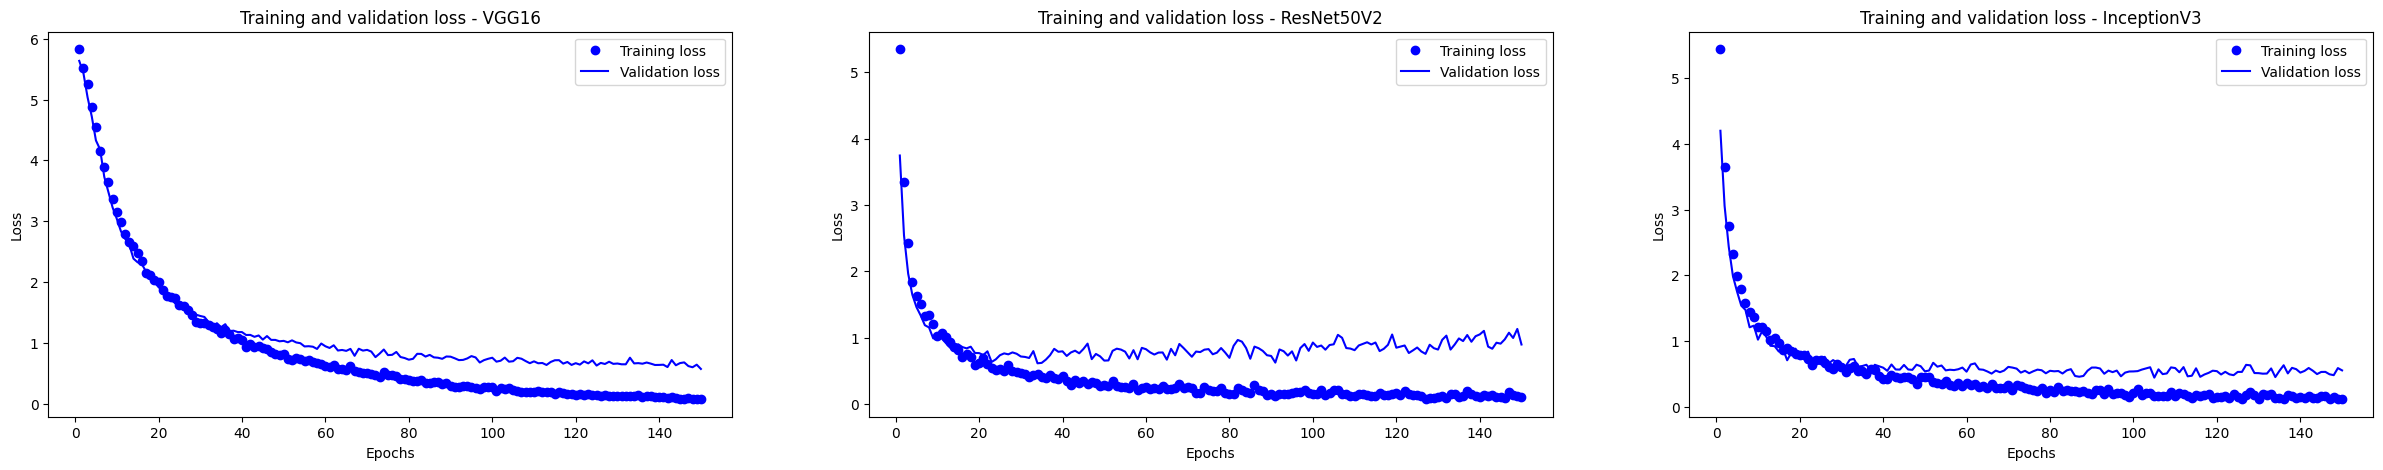

In [14]:
# Plotting Training loss vs Validation loss for comparison
plt.figure(figsize=(30,5))

plt.subplot(131)
plt.plot(epochs_vgg, loss_values_vgg, 'bo', label = 'Training loss')
plt.plot(epochs_vgg, val_loss_values_vgg, 'b', label = 'Validation loss')
plt.title('Training and validation loss - VGG16')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(132)
plt.plot(epochs_resnet, loss_values_resnet, 'bo', label = 'Training loss')
plt.plot(epochs_resnet, val_loss_values_resnet, 'b', label = 'Validation loss')
plt.title('Training and validation loss - ResNet50V2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(133)
plt.plot(epochs_inception, loss_values_inception, 'bo', label = 'Training loss')
plt.plot(epochs_inception, val_loss_values_inception, 'b', label = 'Validation loss')
plt.title('Training and validation loss - InceptionV3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

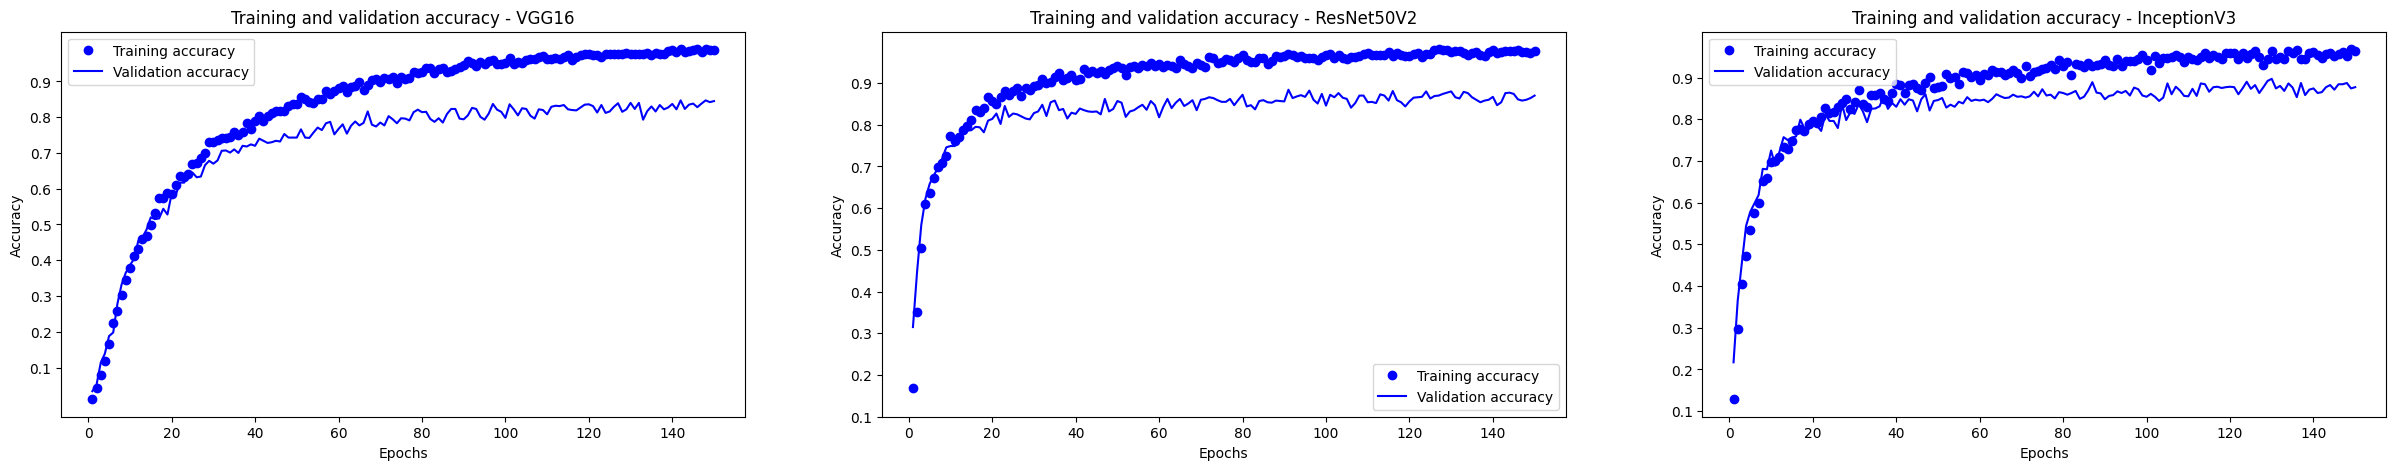

In [15]:
# Plotting Training accuracy vs Validation accuracy for comparison
plt.figure(figsize=(30,5))

plt.subplot(131)
plt.plot(epochs_vgg, acc_values_vgg, 'bo', label = 'Training accuracy')
plt.plot(epochs_vgg, val_acc_values_vgg, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy - VGG16')
plt.xlabel('Epochs')
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(132)
plt.plot(epochs_resnet, acc_values_resnet, 'bo', label = 'Training accuracy')
plt.plot(epochs_resnet, val_acc_values_resnet, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy - ResNet50V2')
plt.xlabel('Epochs')
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(133)
plt.plot(epochs_inception, acc_values_inception, 'bo', label = 'Training accuracy')
plt.plot(epochs_inception, val_acc_values_inception, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy - InceptionV3')
plt.xlabel('Epochs')
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Model Discussion

It can be difficult to tell apart each model in this case. Each appears to be still training with a chance of having better results. This is largely due to the small learning rate attached to each model. However, larger learning rates saw drastically increased volatility and much worse accuracy for this dataset. I was unable to gather any insight from these higher learning rates (testing 0.01 and 0.001 values). As a result, a smaller learning rate with a higher number of epochs is the correct approach being used. The main concern related to this approach is the weights getting stuck at a local minimum rather than finding the correct area of the global minimum. This is refuted by the use of pre-loaded ImageNet weights, should provide clearer direction to the model. Additionally, training times increase becuase it takes more epochs to find optimal weights. For the sake of model comparison I will accept these potential faults, especially since the results are much easier to read, much less volatility is present in the output, the accuracy (both training and validation) reach much higher maximas, and the loss (both training and validation) reach much lower minimas.

In regards to compared model performance between the three architectures, It is difficult to determine which model is best to proceed with. VGG16 appears to be gradually improving still, but is still approximately 5% behind the other two models in terms of accuracy. It is unclear whether or not it will achieve the same accuracy, and so I would prefer not to select the VGG16 model. 

The decision between ResNet50V2 and InceptionV3 is very interesting considering the very similar progression between the two models. Both achieve similar maximum validation accuracy (88.4% for ResNet50V2 and 89.2% for InceptionV3). However, there is more meaningful separation between the training and validation accuracy in the ResNet50V2 model. This signals more possible improvement with hyperparameter tuning. Therefore, I will proceed with using the ResNet50V2. The slightly better validation accuracy of InceptionV3 can be explained by variance which is relatively high in neural networks in comparison to other machine learning predictive models.

It is possible that with more epochs, the VGG16 model becomes comparable to the other two architectures, but it is not certain after 75 epochs. Additionally, InceptionV3 and ResNet50V2 have performed similarly. However, there is a plateau in results that occur sooner in the ResNet50V2 that could signal more impactful change being possible by properly tuning that model architecture.

Another reason why this training took so long was that all weights and layers were trainable. A benefit of pre-loading weights into the convolutional layers of the neural network is that it is possible to limit the trained layers. This would reduce the number of tuned parameters which then reduces the numer of tuned parameters, reduces the necessary number of epochs for training, and reduces training time. While this can reduce the accuracy of a model, many of the earlier layers find general patterns and shapes that can be applied to a large variety of images. Later layers find patterns more specific to the data set it is being trained for. I will be setting some layers to untrainable in the final model for the purpose of saving time and to test more hyperparameter, layer, and data augmentation combinations.

In [16]:
resnet_base.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         